In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('food_comp_raw.csv')
df = data.drop(['NDB_No','Shrt_Desc'],axis=1)
df = df.dropna(axis=0)
X = df.to_numpy()

u = np.mean(X,axis=0)
std = np.mean(X,axis=0)
d = np.where( np.logical_or(X >= u + 1.8*std ,X <= u + 1.8 *-std))
X = np.delete(X,d[0],axis=0)

data = data.dropna(axis=0).drop(['NDB_No'],axis=1)
indmap = dict()
for i,row in enumerate(data.index):
    indmap[row] = i
data.rename(indmap,axis=0,inplace=True)
data.drop(list(set(d[0])),axis=0,inplace=True)
data.rename({row: i for i,row in enumerate(data.index)},axis=0,inplace=True)
data.to_csv('food_comp_processed.csv')

c:\Users\mill288\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


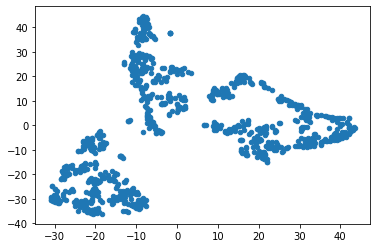

(948, 46)


In [47]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE

d = pairwise_distances(X / np.max(X))
Y = TSNE(perplexity=30,init='pca',learning_rate='auto').fit_transform(d)

import pylab 
pylab.scatter(Y[:,0],Y[:,1],20)
pylab.show()
print(X.shape)

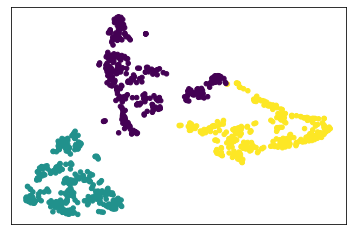

In [50]:
from sklearn.cluster import KMeans
C = KMeans(n_clusters=3).fit_predict(Y) #TSNE projection 
#C = KMeans(n_clusters=3).fit_predict(X / np.max(X)) #High dimensional space
fig,ax = pylab.subplots()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

pylab.scatter(Y[:,0],Y[:,1],20,C)
data['class'] = C
data.to_csv('food_comp_processed.csv')

c:\Users\mill288\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


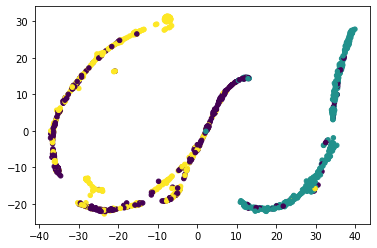

In [ ]:
subspace = data[['Protein_(g)', 'Vit_B6_(mg)','Vit_B12_(µg)','Vit_D_µg']]
X = subspace.to_numpy()

d = pairwise_distances(X / np.max(X))
Y = TSNE(perplexity=30, init='pca', learning_rate='auto').fit_transform(d)

pylab.scatter(Y[:,0],Y[:,1],20,C)
pylab.show()

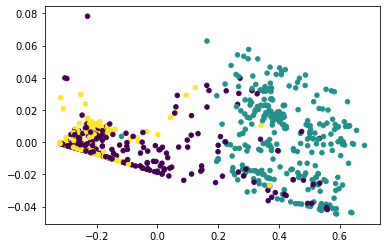

In [ ]:
from sklearn.decomposition import PCA

Y = PCA(n_components=2).fit_transform(X/np.max(X))

pylab.scatter(Y[:,0],Y[:,1],20,C)
pylab.show()

c:\Users\mill288\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


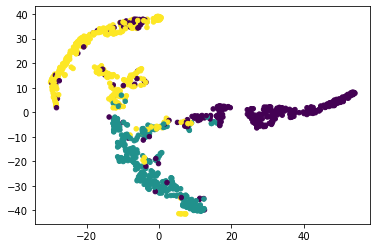

In [ ]:
subspace = data[['Protein_(g)', 'Vit_B6_(mg)','Vit_B12_(µg)',
                'Vit_D_µg','Water_(g)','Vit_E_(mg)','Sodium_(mg)',
                'Lipid_Tot_(g)','Energ_Kcal']]
X = subspace.to_numpy()

d = pairwise_distances(X / np.max(X))
Y = TSNE(perplexity=30, init='pca', learning_rate='auto').fit_transform(d)

pylab.scatter(Y[:,0],Y[:,1],20,C)
pylab.show()


c:\Users\mill288\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


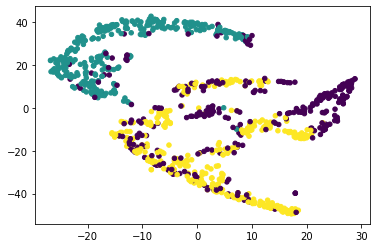

In [ ]:
subspace = data.drop(['Protein_(g)', 'Vit_B6_(mg)','Vit_B12_(µg)',
                'Vit_D_µg','Water_(g)','Vit_E_(mg)','Sodium_(mg)',
                'Lipid_Tot_(g)','Energ_Kcal','Shrt_Desc'],axis=1)
X = subspace.to_numpy()[:,1:]

d = pairwise_distances(X / np.max(X))
Y = TSNE(perplexity=30, init='pca', learning_rate='auto').fit_transform(d)

pylab.scatter(Y[:,0],Y[:,1],20,C)
pylab.show()


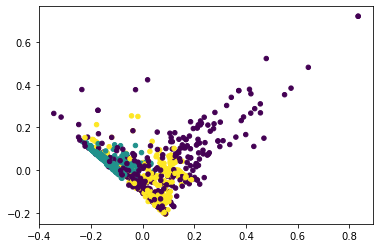

In [ ]:
Y = PCA(n_components=2).fit_transform(X/np.max(X))

pylab.scatter(Y[:,0],Y[:,1],20,C)
pylab.show()

(948, 4)
(948, 5)
len 1
len 1


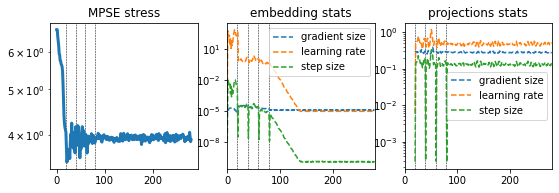

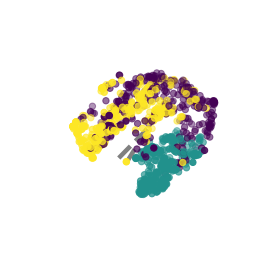

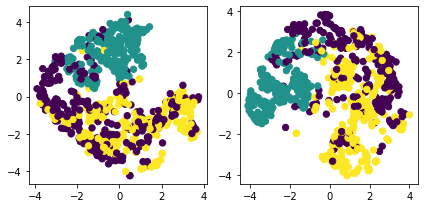

In [ ]:
import mview 

# x1 = data.drop(['Protein_(g)', 'Vit_B6_(mg)','Vit_B12_(µg)',
#                 'Vit_D_µg','Water_(g)','Vit_E_(mg)','Sodium_(mg)',
#                 'Lipid_Tot_(g)','Energ_Kcal','Shrt_Desc'],axis=1).to_numpy()[:,1:]
# x2 = data[['Protein_(g)', 'Vit_B6_(mg)','Vit_B12_(µg)',
#                 'Vit_D_µg','Water_(g)','Vit_E_(mg)','Sodium_(mg)',
#                 'Lipid_Tot_(g)','Energ_Kcal']].to_numpy()

x1 = data[['Protein_(g)', 'Vit_B6_(mg)', 'Vit_B12_(µg)', 'Vit_D_µg']].to_numpy()
x2 = data[['Water_(g)','Vit_E_(mg)','Sodium_(mg)','Lipid_Tot_(g)','Energ_Kcal']].to_numpy()
x1 /= x1.max(axis=0)
x2 /= x2.max(axis=0)

mview.mpse_tsne([x1,x2],perplexity=30,
                    iters=200,sample_colors=[C,C], sample_classes=[C,C],show_plots=True)

In [ ]:
import numpy as np

cluster1 = np.random.normal(2, 2, (100,5))
noise1 = np.random.random( (100,5) ) * 10

cluster2 = np.random.normal(0, 1.2, (100,5))
noise2 = np.random.random( (100,5) ) * 10

x1 = np.concatenate((cluster1,noise1),axis=1)
x2 = np.concatenate((noise2,cluster2), axis=1)

x = np.concatenate((x1,x2),axis=0)

x.shape


(200, 10)

c:\Users\mill288\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


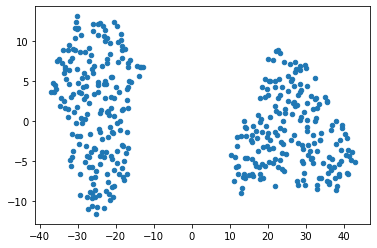

In [ ]:
d = pairwise_distances(x / np.max(x))
Y = TSNE(perplexity=30, init='pca', learning_rate='auto').fit_transform(d)

pylab.scatter(Y[:,0],Y[:,1],20)
pylab.show()

(200, 5)
(200, 5)
len 1
len 1


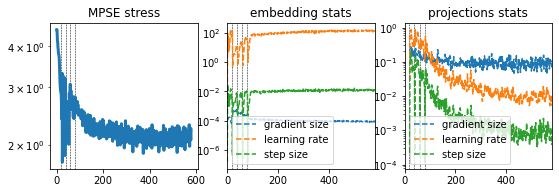

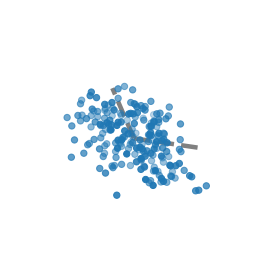

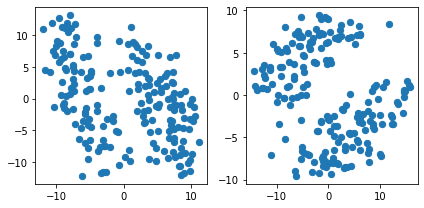

In [ ]:
import mview
x /= np.max(x)
x1 = x[:,:5]
x2 = x[:,5:]

mview.mpse_tsne([x1,x2],perplexity=20,show_plots=True,iters=500)

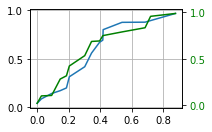

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

x = np.sort(np.random.rand(15))
y = np.sort(np.random.rand(15))
y2 = np.sort(np.random.rand(15))

fig = plt.figure()
ax1 = plt.subplot(2, 2, 1)
line1, = plt.plot(x,y)
ax1.grid(True)

ax2 = ax1.twinx()
line2, = ax2.plot(x, y2, color='green')
ax2.tick_params(axis='y', labelcolor='green')

annots = []
for ax in [ax1, ax2]:
    annot = ax1.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w", alpha=0.4),
                        arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)
    annots.append(annot)

annot_dic = dict(zip([ax1, ax2], annots))
line_dic = dict(zip([ax1, ax2], [line1, line2]))

def update_annot(line, annot, ind):
    x,y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    text = "x = {}\ny= {}".format(x[ind["ind"][0]], y[ind["ind"][0]])
    annot.set_text(text)

def hover(event):

    if event.inaxes in [ax1, ax2]:
        for ax in [ax1, ax2]:
            cont, ind = line_dic[ax].contains(event)
            annot = annot_dic[ax]
            if cont:
                update_annot(line_dic[ax], annot, ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if annot.get_visible():
                    annot.set_visible(False)
                    fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

In [31]:
import pandas as pd 
import numpy as np 

data = pd.read_csv('food_comp_processed.csv')

data.drop(['Unnamed: 0'], axis=1,inplace=True)

X = data.drop(['Shrt_Desc'], axis=1).to_numpy()

C = KMeans(n_clusters=3).fit_predict(X / np.max(X,axis=0))


c:\Users\mill288\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\mill288\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


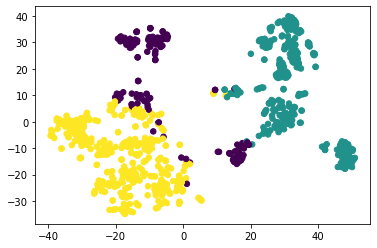

In [33]:
Y = TSNE().fit_transform(X / np.max(X,axis=0))
pylab.scatter(Y[:,0],Y[:,1],30,C)
pylab.show()

In [16]:
from sklearn import datasets
wine = datasets.load_wine()
data, classes = wine['data'], wine['target']
data.shape

(178, 13)

c:\Users\mill288\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\mill288\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


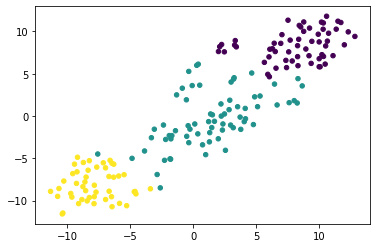

In [14]:
data /= np.max(data,axis=0)
Y = TSNE().fit_transform(data)
pylab.scatter(Y[:,0],Y[:,1],20, classes)
pylab.show()